<a href="https://colab.research.google.com/github/DeenReinierCrusem/CPEN65-1/blob/main/Laboratory_Exercise_3_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Laboratory Exercise 3: Support Vector Machine


In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.0001, alpha=alpha,
                        max_iter=1000, tol=0.33, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [0.28475098] [[1.05364854 1.09903804]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [-2.71050543e-20] [[0.05819593 0.05761497]]


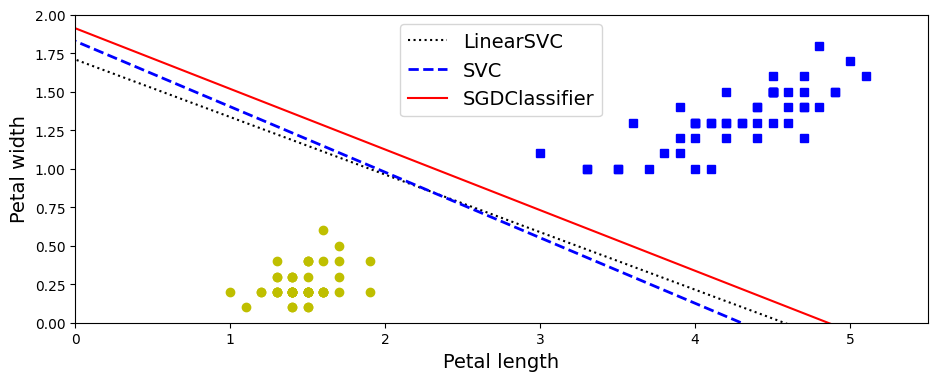

In [ ]:
# Compute the slope and bias of each decision boundary
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

import matplotlib.pyplot as plt

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train, y_train)

coef = clf.coef_

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.994060876020787

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [ ]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [ ]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9955456570155902

In [ ]:
svm_clf = SVC(gamma="scale")
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC()

In [ ]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9977728285077951

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....C=6.746332676832253, gamma=0.052114068780575944; total time=   0.2s
[CV] END ....C=6.746332676832253, gamma=0.052114068780575944; total time=   0.2s
[CV] END ....C=6.746332676832253, gamma=0.052114068780575944; total time=   0.2s
[CV] END ...C=9.175546691442205, gamma=0.0015309636740615893; total time=   0.1s
[CV] END ...C=9.175546691442205, gamma=0.0015309636740615893; total time=   0.1s
[CV] END ...C=9.175546691442205, gamma=0.0015309636740615893; total time=   0.1s
[CV] END ...C=9.601912122682137, gamma=0.0036344306948980897; total time=   0.1s
[CV] END ...C=9.601912122682137, gamma=0.0036344306948980897; total time=   0.1s
[CV] END ...C=9.601912122682137, gamma=0.0036344306948980897; total time=   0.1s
[CV] END .....C=6.093975570680116, gamma=0.07291579836711096; total time=   0.1s
[CV] END .....C=6.093975570680116, gamma=0.07291579836711096; total time=   0.1s
[CV] END .....C=6.093975570680116, gamma=0.07291

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fc8168ba7d0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fc8168bbdf0>},
                   verbose=2)

In [ ]:
rnd_search_cv.best_estimator_

SVC(C=9.175546691442205, gamma=0.0015309636740615893)

In [ ]:
rnd_search_cv.best_score_

0.9780019540498582

In [ ]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=9.175546691442205, gamma=0.0015309636740615893)

In [ ]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9925760950259837

In [ ]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9844444444444445

In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

0.9641780189948642

In [ ]:
np.sqrt(mse)

0.9819256687727764

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, cv=3, random_state=42)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=  19.7s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=  11.0s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=  10.0s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=   9.5s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=   9.1s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=   9.9s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   9.4s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   8.0s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=  10.5s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787431; total time=   9.2s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787431; total time=  10.9s
[CV] END ....C=1.5808361216819946, gamma=0.05399

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fc81aceefb0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fc81ada6a40>},
                   random_state=42, verbose=2)

In [ ]:
rnd_search_cv.best_estimator_

SVR(C=4.745401188473625, gamma=0.07969454818643928)

In [ ]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

0.5727524770785356

In [ ]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

0.592916838552874

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets, metrics, preprocessing
from sklearn.svm import SVC

# Load the MNIST dataset
mnist = datasets.load_digits()

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.25)

# Train the SVM classifier on the training set
clf = SVC()
clf.fit(X_train, y_train)

# Evaluate the SVM classifier on the test set
y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Tune the hyperparameters of the SVM classifier using a small validation set
C_values = [0.1, 1, 10, 100]
gamma_values = [0.001, 0.01, 0.1, 1]
best_accuracy = 0
best_C = None
best_gamma = None
for C in C_values:
  for gamma in gamma_values:
    clf = SVC(C=C, gamma=gamma)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_C = C
      best_gamma = gamma

# Retrain the SVM classifier with the best hyperparameters
clf = SVC(C=best_C, gamma=best_gamma)
clf.fit(X_train, y_train)

# Evaluate the SVM classifier with the best hyperparameters
y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy with best hyperparameters:", accuracy)

Accuracy: 0.9866666666666667
Accuracy with best hyperparameters: 0.9933333333333333
